In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

In [2]:
df = pd.read_csv(r'C:\Users\kevin\Desktop\VSCode\Zecser\data\kaggle\Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


In [4]:
df.sample(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
115929,115930,B000F0FZAU,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",0,0,5,1323907200,It'll Cure Whatever Ails You,The other reviewer's comments influenced my pu...
117239,117240,B002AU4V94,A1BJ67411QA0WZ,BB,2,8,1,1252368000,Where's the chocolate?,I don't have any dietary restrictions. I boug...
196276,196277,B002PO7ZDY,A2G6L39VVF9J3R,Lindsay,1,1,1,1346889600,Overpriced,I should've done my research first. Basically ...
40221,40222,B0030GOO5S,A2UZUH4ZY6KFQF,LuvMyMini,1,1,1,1314403200,DISGUSTING!!!!!,I love a good cup of hot cocoa now and then. ...
271613,271614,B004JWOI6W,A2HYET6EWTBFIN,M. Cole,0,0,3,1336694400,It's Sprite.,24 of them to be exact... 20 ounces per bottle...


In [5]:
df.shape

(568454, 10)

In [6]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,568454.0,2.842275e+05,1.640987e+05,1.0,1.421142e+05,2.842275e+05,4.263408e+05,5.684540e+05
HelpfulnessNumerator,568454.0,1.743817e+00,7.636513e+00,0.0,0.000000e+00,0.000000e+00,2.000000e+00,8.660000e+02
HelpfulnessDenominator,568454.0,2.228810e+00,8.289740e+00,0.0,0.000000e+00,1.000000e+00,2.000000e+00,9.230000e+02
Score,568454.0,4.183199e+00,1.310436e+00,1.0,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
Time,568454.0,1.296257e+09,4.804331e+07,939340800.0,1.271290e+09,1.311120e+09,1.332720e+09,1.351210e+09


In [9]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [10]:
df.dropna(inplace=True)
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df[['Summary', 'Score']].head()

,Summary,Score
0,Good Quality Dog Food,5
1,Not as Advertised,1
2,"""Delight"" says it all",4
3,Cough Medicine,2
4,Great taffy,5


In [13]:
df[df['Score'] > 4]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
...,...,...,...,...,...,...,...,...,...,...
568448,568449,B001EO7N10,A1F6BHEYB7R6R7,James Braley,0,0,5,1308096000,Very large ground spice jars.,My only complaint is that there's so much of i...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [14]:
df[df['Score'] > 4][['ProfileName', 'Score']]

,ProfileName,Score
0,delmartian,5
4,"Michael D. Bigham ""M. Wassir""",5
6,David C. Sullivan,5
7,Pamela G. Williams,5
8,R. James,5
...,...,...
568448,James Braley,5
568449,Lettie D. Carter,5
568451,"pksd ""pk_007""",5
568452,"Kathy A. Welch ""katwel""",5


In [15]:
df[(df['Score'] > 4) & (df['HelpfulnessNumerator'] > 3)][['ProfileName', 'Score', 'HelpfulnessNumerator']].sample(5)

,ProfileName,Score,HelpfulnessNumerator
18557,N. Johnson,5,6
109144,norton850,5,4
88712,Kayo,5,5
381031,Kelvin L. Cox,5,6
330554,hellogawjus,5,8


In [16]:
df.sort_values(by='Score', ascending=False).head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
338699,338700,B004Z4HUPA,A3KHFQBQ16Z03D,Bridgett Wilson,0,1,5,1345766400,Perfection,The forgot to mention 0 after taste... I notic...
338716,338717,B003UAQHOU,AIZWF6JVIZTC5,Tonya Artzer,1,1,5,1337990400,Hill Science Diet Dry Puppy Food,Have fed our Siberian Husky this food since sh...
338714,338715,B001VNFOZ6,A144UI9S7Z9MYA,Rachel Marie Zhao,3,3,5,1307923200,Excellent Chinese Five Spice,"''' For those who cook Chinese Chicken, Duck, ..."
338713,338714,B001VNFOZ6,A276OI0NHBYORX,Rebecca N,6,7,5,1300492800,"Great product, price, and well packaged",This is traditional 5 spice powder. The right...
338711,338712,B001VNFOZ6,A15P7Q1WK4RED0,Terri Fountain,6,6,5,1293667200,Love 5 Spice,This spice is so hard to find where I live. S...
338710,338711,B001VNFOZ6,A2ZE8BSZ5MMEOP,"Jasmine ""Uniquely Yours""",14,14,5,1261699200,"Delicious, fresh and convenient Five Spice powder","Frontier Five Spice Powder is a value, also, c..."
338709,338710,B002R83LW2,AJ7L4FL7XLT50,"J. Torres ""judeandjenny""",0,0,5,1294185600,Best home brew coffee!,As did another reviewer... I tried this coffee...
338708,338709,B002R83LW2,A3TTI1LVI0A7MS,Romeo,0,0,5,1305331200,Great Coffee,I found two of the finest resturants in my hom...
338707,338708,B002R83LW2,A25B0YK51CTBVN,boone1729,0,0,5,1313366400,Best Coffee Ever!!!,"I am not a coffee person, but I am in love wit..."


In [17]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [18]:
cols_to_drop = ['Id', 'ProductId', 'UserId', 'ProfileName', 'Time', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Summary']
df.drop(cols_to_drop, axis=1, inplace=True)

In [19]:
df.head()

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


In [20]:
df.columns

Index(['Score', 'Text'], dtype='object')

In [21]:
df.duplicated().sum()

174745

In [22]:
df['Text'].duplicated().sum()

174841

In [23]:
df.drop_duplicates(subset=['Text'], inplace=True)

In [24]:
df.duplicated().sum()

0

In [25]:
df['Text'].duplicated().sum()

0

In [26]:
df.isnull().sum()

Score    0
Text     0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393560 entries, 0 to 568453
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Score   393560 non-null  int64 
 1   Text    393560 non-null  object
dtypes: int64(1), object(1)
memory usage: 9.0+ MB


In [29]:
df.groupby('Score')['Text'].min()

Score
1    ! think I just ruined my dish. open this and p...
2    "6 Tins" arrived as 1 tin wrapped in paper and...
3    !!!<br />Animal digest? She does that on her o...
4    "... organic dark chocolate chips (organic sug...
5    !!HEY, these are BIG! There are actually two c...
Name: Text, dtype: object

<Axes: xlabel='Score', ylabel='Count'>

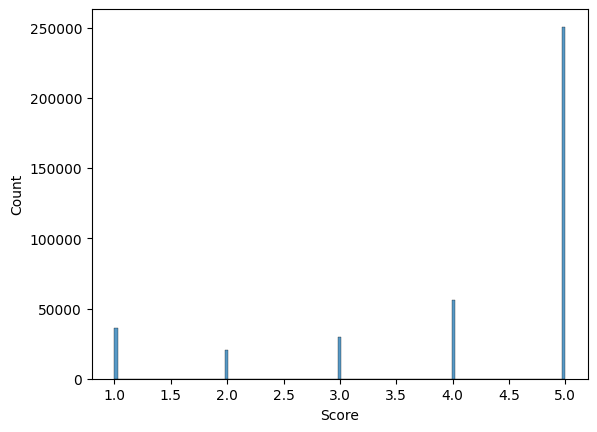

In [30]:
sns.histplot(df['Score'])

<Axes: xlabel='Score'>

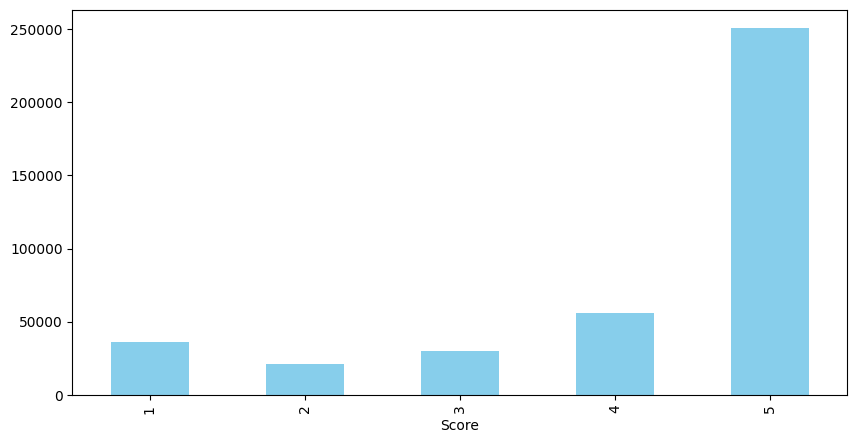

In [31]:
df['Score'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), color='skyblue')

In [32]:
print(df['Score'].value_counts())

Score
5    250705
4     56041
1     36272
3     29752
2     20790
Name: count, dtype: int64


In [33]:
target_count = df['Score'].value_counts().min()

preprocessed_df = (
    df.groupby('Score')
      .apply(lambda x: x.sample(n=target_count, random_state=42))
      .reset_index(drop=True)
)

In [34]:
print(preprocessed_df['Score'].value_counts())

Score
1    20790
2    20790
3    20790
4    20790
5    20790
Name: count, dtype: int64


C:\Users\kevin\AppData\Local\Temp\ipykernel_4892\704633087.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=preprocessed_df, x='Score', palette='viridis')


<Axes: xlabel='Score', ylabel='count'>

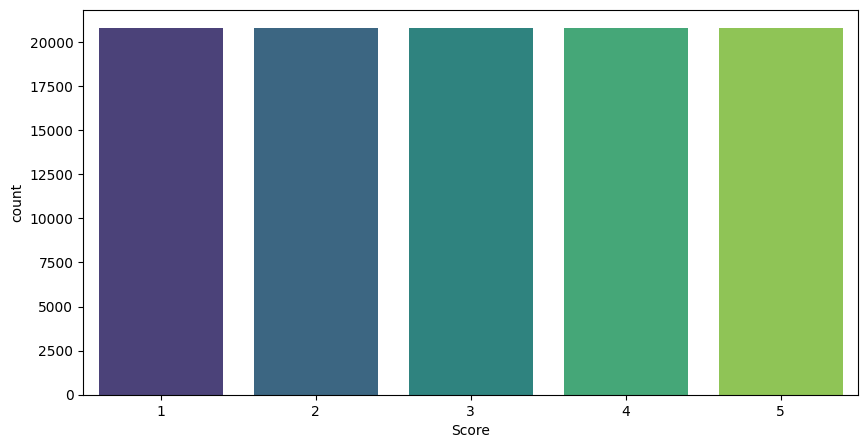

In [35]:
plt.figure(figsize=(10, 5))
sns.countplot(data=preprocessed_df, x='Score', palette='viridis')

In [36]:
preprocessed_df.head()

,Score,Text
0,1,I used to purchase them at wholefoods market. ...
1,1,Since the ingredient information is missing on...
2,1,"Being a cinnamon candy nut at Valentines, I wa..."
3,1,This has to be the world's smallest box of cho...
4,1,This item can be purchased in stores for much ...


In [37]:
preprocessed_df.duplicated().sum()

0

In [38]:
preprocessed_df.isnull().sum()

Score    0
Text     0
dtype: int64

In [39]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [40]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [41]:
def preprocess(text):

    text = text.lower()     #Lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text)     # Remove URLs     
    text = re.sub(r'<.*?>', ' ', text)   # Remove HTML tags
    text = re.sub(r'\d+', '', text)     # Remove digits
    text = text.translate(str.maketrans('', '', string.punctuation))    # Remove punctuation
    tokens = word_tokenize(text)    # Tokenize the text
    clean_tokens = [
        lemmatizer.lemmatize(token)
        for token in tokens
        if token not in stop_words and len(token) > 2
    ]       # Remove stopwords and short tokens

    return ' '.join(clean_tokens)

In [43]:
preprocessed_df['Cleaned_Text'] = preprocessed_df['Text'].apply(preprocess)

In [44]:
preprocessed_df.isnull().sum()

Score           0
Text            0
Cleaned_Text    0
dtype: int64

In [45]:
preprocessed_df.duplicated().sum()

0

In [46]:
preprocessed_df.head()

,Score,Text,Cleaned_Text
0,1,I used to purchase them at wholefoods market. ...,used purchase wholefoods market bought pack gr...
1,1,Since the ingredient information is missing on...,since ingredient information missing amazoncom...
2,1,"Being a cinnamon candy nut at Valentines, I wa...",cinnamon candy nut valentine pretty excited le...
3,1,This has to be the world's smallest box of cho...,world smallest box chocolate even advertised l...
4,1,This item can be purchased in stores for much ...,item purchased store much le weight listedonly...


In [47]:
# Save the cleaned csv to a new file. Execute only once to avoid overwriting.
path = r'C:\Users\kevin\Desktop\VSCode\Zecser\data\cleaned_dataset'
os.makedirs(path, exist_ok=True)
if not os.path.exists(os.path.join(path, 'cleaned_Reviews.csv')):
    preprocessed_df.to_csv(os.path.join(path, 'cleaned_Reviews.csv'), index=False)
    print("Cleaned dataset saved successfully.")

Cleaned dataset saved successfully.
